In [74]:
import Bio
import numpy as np
import math
import random
import matplotlib.pyplot as plt
random.seed()

In [42]:
genes = {"A":300,"B":300,"C":0,"D":0,"E":0,"F":0}
genarr = list(genes.values())
lam = 0.25
alph = 250
ki = 200
ka = 400
hi = 2
ha = 20

In [43]:
def compDs():
    #print(genes)
    dgAdt = (alph * (1/(1+np.power((genes["B"]/ki),hi)))) - lam*genes["A"]
    dgBdt = (alph * (1/(1+np.power((genes["A"]/ki),hi)))) - lam*genes["B"]
    dgCdt = (alph * (1/(1+np.power((ka/genes["A"]),ha))) * (1/(1+np.power((genes["D"]/ki),hi)))) - lam*genes["C"]
    dgDdt = (alph * (1/(1+np.power((ka/genes["A"]),ha))) * (1/(1+np.power((genes["C"]/ki),hi)))) - lam*genes["D"]
    dgEdt = (alph * (1/(1+np.power((ka/genes["B"]),ha))) * (1/(1+np.power((genes["F"]/ki),hi)))) - lam*genes["E"]
    dgFdt = (alph * (1/(1+np.power((ka/genes["B"]),ha))) * (1/(1+np.power((genes["E"]/ki),hi)))) - lam*genes["F"]
    return [dgAdt,dgBdt,dgCdt,dgDdt,dgEdt,dgFdt]

In [44]:
for i in compDs():
    print(i)
diffs = compDs()

1.923076923076934
1.923076923076934
0.7902967861300224
0.7902967861300224
0.7902967861300224
0.7902967861300224


In [45]:
deltt = 1
sigma = 10
tmax = 100
tmin = 0
y = 0
print(y)

0


In [46]:
def fixGenes(genes, genarr):
    #print(genes)
    genes["A"] = genarr[0]
    genes["B"] = genarr[1]
    genes["C"] = genarr[2]
    genes["D"] = genarr[3]
    genes["E"] = genarr[4]
    genes["F"] = genarr[5]
    return genes

In [47]:
sixdim = []
for rep in range(400):
    stop = random.randint(tmin,tmax-1)
    genes = {"A":300,"B":300,"C":0,"D":0,"E":0,"F":0}
    genarr = list(genes.values())
    for t in range(tmin,stop):
        for g in range(len(genes)):
            y = genarr[g] + (diffs[g]*deltt) + (sigma*np.sqrt(deltt)*random.gauss(0,1))
            genarr[g] = y
        #print(genes)
        genes = fixGenes(genes,genarr)
        diffs = compDs()
    #print(genes)
    genarr = list(genes.values())
    sixdim.append(genarr)

[4.452698826762086, 7.412617082670835, 1.5814273697782477, -0.0006234945997622976, 5.767087884554442, 6.180309276338221]


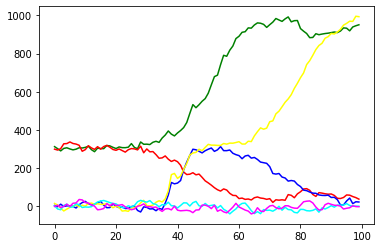

In [71]:
singrun = []
genes = {"A":300,"B":300,"C":0,"D":0,"E":0,"F":0}
genarr = list(genes.values())
print(diffs)
for t in range(tmin,100):
    diffs = compDs()
    for g in range(len(genes)):
        y = genarr[g] + (diffs[g]*deltt) + (sigma*np.sqrt(deltt)*random.gauss(0,1))
        genarr[g] = y
    #print(genes)
    genes = fixGenes(genes,genarr)
    singrun.append(genarr[:])
    #print(singrun)
singrun = np.array(singrun)
#print(singrun)
fig = plt.figure()
plt.plot(singrun[:,0], color='green')
plt.plot(singrun[:,1], color='red')
plt.plot(singrun[:,2], color='blue')
plt.plot(singrun[:,3], color='yellow')
plt.plot(singrun[:,4], color='cyan')
plt.plot(singrun[:,5], color='magenta')

In [78]:
sixdim = np.round(np.array(sixdim),2)
print(sixdim.shape)

(400, 6)


In [99]:
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(n_components=3)
transformed = embedding.fit_transform(sixdim)
print(transformed.shape)

(400, 3)


In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(6).fit_predict(transformed)
#print(kmeans)

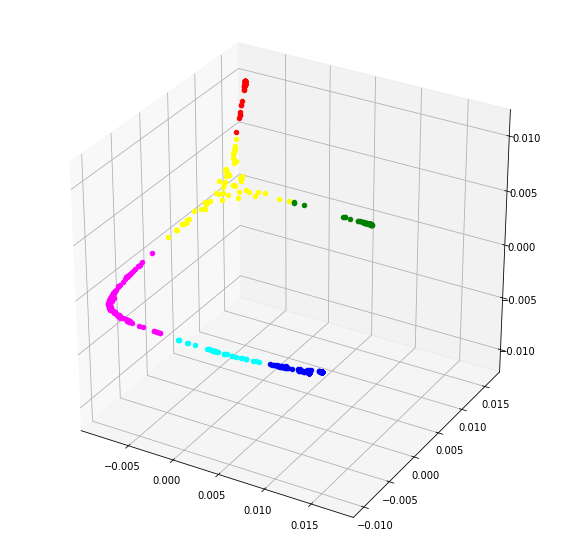

In [117]:
colors = ["red","blue","yellow","green","magenta","cyan"]
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
z_points = transformed[:,0]
x_points = transformed[:,1]
y_points = transformed[:,2]
for i in range(len(z_points)):
    coolr = colors[kmeans[i]]
    ax.scatter3D(x_points[i], y_points[i], z_points[i], c=coolr, cmap='hsv');
plt.show()

In [122]:
clusters = [[],[],[],[],[],[]]
for k in range(len(kmeans)):
    clusters[kmeans[k]].append(sixdim[k])

for e in range(len(clusters)):
    print("Cluster "+str(e))
    clusters[e] = np.mean(clusters[e],axis=0)
    print(clusters[e])
            

Cluster 0
[ 4.66495652e+01  9.45609348e+02 -1.59239130e+00 -6.36304348e-01
  5.55473913e+01  8.85347174e+02]
Cluster 1
[9.17771204e+02 4.92383333e+01 4.27536944e+02 4.16991759e+02
 4.99907407e-01 4.62962963e-04]
Cluster 2
[ 1.08262586e+02  6.93496379e+02 -1.71603448e+00  3.20172414e-01
  3.01054655e+02  3.18625172e+02]
Cluster 3
[ 4.32700000e+01  9.45768776e+02 -3.93469388e-01  2.20510204e+00
  8.87892857e+02  5.65444898e+01]
Cluster 4
[302.53580952 308.36533333  16.32790476  14.06942857  17.72971429
  20.78009524]
Cluster 5
[498.67794118 175.28970588 279.48264706 257.56029412   1.56676471
   1.29323529]


In [116]:
from pydiffmap import diffusion_map as dm
# initialize Diffusion map object.
neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}

mydmap = dm.DiffusionMap.from_sklearn(n_evecs=6, k=200, epsilon='bgh', alpha=1.0, neighbor_params=neighbor_params)
# fit to data and return the diffusion map.
dmap = mydmap.fit_transform(sixdim)

ArpackNoConvergence: ARPACK error -1: No convergence (4001 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]

In [ ]:
from pydiffmap.visualization import embedding_plot, data_plot

embedding_plot(mydmap, scatter_kwargs = {'c': dmap[:,0], 'cmap': 'Spectral'})
data_plot(mydmap, dim=3, scatter_kwargs = {'cmap': 'Spectral'})

plt.show()